# Project 2: Billboard Hits

## 1. About the data

From [Wikipedia](https://en.wikipedia.org/wiki/Billboard_Hot_100)

> The Billboard Hot 100 is the music industry standard record chart in the United States for singles, published weekly by Billboard magazine. **Chart rankings are based on radio play, online streaming, and sales (physical and digital).**

Also [here](http://pitchfork.com/features/article/9378-i-know-you-got-soul-the-trouble-with-billboards-rbhip-hop-chart/)
> Ideally, any effective genre chart—be it R&B, Latin, country, even alt-rock—doesn’t just track a particular strain of music, which can be marked by ever-changing boundaries and ultimately impossible to define. It’s meant to track an audience.

Another from [Wikipedia](https://en.wikipedia.org/wiki/Billboard_charts)
> What separates the charts is which stations and stores are used; each musical genre has a core audience or retail group. Each genre's department at Billboard is headed up by a chart manager, who makes these determinations.

## 2. Problem statement

- Does the length of a song affect how long it takes to peak in the top 100?
- Does the amount of time a song takes to peak affect how long it stays in the top 100?
- Does the period of the year in which a song enters the top 100 affect how far up the chart it can go?

## 3. Importing relevant libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 4. Loading the data

In [7]:
df = pd.read_csv('assets/billboard.csv', na_values='*')

In [8]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Risks & Assumptions

**Assumptions**
- The data contains a record of the tracks which hit the top 100
- The genre of the song/ artist is correctly categorized based on the radio stations that played it/ streaming data
- The columns beginning with 'x' indicate a timeline, where x1st.week is the first week that the track enters the top 100
- The columns beginning with 'x' contain the rank of the track if it was currently in the top 100 and a null value if it was no longer within  the top 100

**Risks**
- There may not be enough data to answer the problem statements
    - Sample size is too small
    - Data is only from 1 year

## 6. Cleaning the data

### a. Is the column 'year' useful?

In [9]:
df['year'].value_counts()

2000    317
Name: year, dtype: int64

**There's only one value in the column so it wouldn't help much.**  
i.e. The data contains a record of the tracks which hit the top 100 for the year 2000

### b. Cleaning artist name column

In [10]:
names = df['artist.inverted'].unique()

In [11]:
print sorted(names)

['2 Pac', '2Ge+her', '3 Doors Down', '504 Boyz', '98\xa1', 'A*Teens', 'Aaliyah', 'Adams, Yolanda', 'Adkins, Trace', 'Aguilera, Christina', 'Alice Deejay', 'Allan, Gary', 'Amber', 'Anastacia', 'Anthony, Marc', 'Avant', 'BBMak', 'Backstreet Boys, The', 'Badu, Erkyah', 'Baha Men', 'Barenaked Ladies', 'Beenie Man', 'Before Dark', 'Bega, Lou', 'Big Punisher', 'Black Rob', 'Black, Clint', 'Blaque', 'Blige, Mary J.', 'Blink-182', 'Bloodhound Gang', 'Bon Jovi', 'Braxton, Toni', 'Brock, Chad', 'Brooks & Dunn', 'Brooks, Garth', 'Byrd, Tracy', 'Cagle, Chris', "Cam'ron", 'Carey, Mariah', 'Carter, Aaron', 'Carter, Torrey', 'Changing Faces', 'Chesney, Kenny', 'Clark Family Experience', 'Clark, Terri', 'Common', 'Counting Crows', 'Creed', 'Cyrus, Billy Ray', "D'Angelo", 'DMX', 'Da Brat', 'Davidson, Clay', 'De La Soul', "Destiny's Child", 'Diffie, Joe', 'Dion, Celine', 'Dixie Chicks, The', 'Dr. Dre', 'Drama', 'Dream', 'Eastsidaz, The', 'Eiffel 65', 'Elliott, Missy "Misdemeanor"', 'Eminem', 'En Vogue',

**Seems like the names are in order (I tried to look through everything) and no further cleaning is required at the moment.**

### c. What about the column 'time'?

It looks like it refers to the length of the track. Let's format it to return length of the track in seconds.

Each value seems to be formatted: m,s,ms. For the purposes of this project, we will drop the millisecond(ms).

In [12]:
def get_sec(x):
    x_list = x.split(',')
    return int(x_list[0]) * 60 + int(x_list[1])


In [13]:
df['track_length_seconds'] = df['time'].map(get_sec)

In [14]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218


### d. Cleaning the 'genre' column

In [15]:
genres = df['genre'].unique()

In [16]:
print sorted(genres)

['Country', 'Electronica', 'Gospel', 'Jazz', 'Latin', 'Pop', 'R & B', 'R&B', 'Rap', 'Reggae', 'Rock', "Rock'n'roll"]


- Rock and Rock'n'roll will be combined to Rock
- R & B and R&B will be combined to R&B

In [17]:
def clean_genre(x):
    if x == 'R & B':
        return 'R&B'
    elif x == "Rock'n'roll":
        return 'Rock'
    else:
        return x

In [18]:
df['genre_clean'] = df['genre'].map(clean_genre)

In [19]:
genre_df = pd.DataFrame(df['genre_clean'].value_counts())
genre_df.columns = ['count']
genre_df['percent'] = genre_df['count']/float(len(genre_df))
genre_df

,count,percent
Rock,137,13.7
Country,74,7.4
Rap,58,5.8
R&B,23,2.3
Pop,9,0.9
Latin,9,0.9
Electronica,4,0.4
Gospel,1,0.1
Jazz,1,0.1
Reggae,1,0.1


- All records that make up less than 1% of the dataset will be combined as others

In [20]:
genres = df['genre_clean'].unique()
genres

array(['Rock', 'Latin', 'Country', 'Rap', 'Pop', 'Electronica', 'Jazz',
       'R&B', 'Reggae', 'Gospel'], dtype=object)

In [21]:
def genre_others(g):
    if g in genres[-6:]:
        return "Others"
    else:
        return g

In [22]:
df['genre_clean'] = df['genre_clean'].map(genre_others)

In [23]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds,genre_clean
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,Rock
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,Rock
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,Rock
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,Rock
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,Rock


#### Let's make genres a numerical column

In [24]:
genres = df['genre_clean'].unique()

In [25]:
genre_num = {x:genres[x] for x in range(len(genres))}
def genre_to_num(g):
    for i in genre_num:
        if genre_num[i] == g:
            return i

In [28]:
genre_num

{0: 'Rock', 1: 'Latin', 2: 'Country', 3: 'Rap', 4: 'Others'}

In [29]:
df['genre_cat'] = df['genre_clean'].map(genre_to_num)

In [30]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds,genre_clean,genre_cat
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,Rock,0
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,Rock,0
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,Rock,0
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,Rock,0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,Rock,0


### e. Formatting the columns 'date.entered' and 'date.peaked'

In [31]:
df['date_entered'] = df['date.entered'].map(pd.to_datetime)
df['date_peaked'] = df['date.peaked'].map(pd.to_datetime)

In [32]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds,genre_clean,genre_cat,date_entered,date_peaked
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,218,Rock,0,2000-09-23,2000-11-18
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,258,Rock,0,2000-02-12,2000-04-08
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,247,Rock,0,1999-10-23,2000-01-29
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,225,Rock,0,2000-08-12,2000-09-16
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,218,Rock,0,2000-08-05,2000-10-14


Let's add a column that shows the number of weeks a track took to peak on the billboard.

In [33]:
df['weeks_to_peak'] = df['date_peaked'] - df['date_entered']

In [34]:
df['weeks_to_peak'].head()

0   56 days
1   56 days
2   98 days
3   35 days
4   70 days
Name: weeks_to_peak, dtype: timedelta64[ns]

In [35]:
def get_weeks(x):
    y = str(x).split()
    return float(y[0])/7.

In [36]:
df['weeks_to_peak'] = df['weeks_to_peak'].map(get_weeks)

In [37]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x73rd.week,x74th.week,x75th.week,x76th.week,track_length_seconds,genre_clean,genre_cat,date_entered,date_peaked,weeks_to_peak
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,NaN,NaN,NaN,NaN,218,Rock,0,2000-09-23,2000-11-18,8.0
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,NaN,NaN,NaN,NaN,258,Rock,0,2000-02-12,2000-04-08,8.0
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,NaN,NaN,NaN,NaN,247,Rock,0,1999-10-23,2000-01-29,14.0
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,NaN,NaN,NaN,NaN,225,Rock,0,2000-08-12,2000-09-16,5.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,NaN,NaN,NaN,NaN,218,Rock,0,2000-08-05,2000-10-14,10.0


Adding a column for season:
- Spring: March to May
- Summer: June to August
- Fall: September to November
- Winter: December to February

In [69]:
def get_season(x):
    x = x.month
    if x <=5 and x >= 3:
        return ['Spring', '0']
    elif x <= 8 and x >= 6:
        return ['Summer', '1']
    elif x <= 11 and x >= 9:
        return ['Fall', '2']
    else:
        return ['Winter', '3']

In [72]:
df['season'] = df['date_entered'].map(lambda x: get_season(x)[0])

In [74]:
df['season_cat'] = df['date_entered'].map(lambda x: get_season(x)[1])

In [75]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,genre_cat,date_entered,date_peaked,weeks_to_peak,weeks_on_billboard,highest_rank,ranks_climbed,rank_entered,season,season_cat
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,0,2000-09-23,2000-11-18,8.0,28,1.0,77.0,78,Fall,2
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,0,2000-02-12,2000-04-08,8.0,26,1.0,14.0,15,Winter,3
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,0,1999-10-23,2000-01-29,14.0,33,1.0,70.0,71,Fall,2
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,0,2000-08-12,2000-09-16,5.0,24,1.0,40.0,41,Summer,1
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,0,2000-08-05,2000-10-14,10.0,21,1.0,56.0,57,Summer,1


### f. Formatting the timeline

In [76]:
df.dropna(how='all', axis=1, inplace=True)

In [77]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,genre_cat,date_entered,date_peaked,weeks_to_peak,weeks_on_billboard,highest_rank,ranks_climbed,rank_entered,season,season_cat
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,0,2000-09-23,2000-11-18,8.0,28,1.0,77.0,78,Fall,2
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,0,2000-02-12,2000-04-08,8.0,26,1.0,14.0,15,Winter,3
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,0,1999-10-23,2000-01-29,14.0,33,1.0,70.0,71,Fall,2
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,0,2000-08-12,2000-09-16,5.0,24,1.0,40.0,41,Summer,1
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,0,2000-08-05,2000-10-14,10.0,21,1.0,56.0,57,Summer,1


**Some of the weeks were totally empty! So we got rid of them.**

### h. How long does a track stay on the billboard?

In [78]:
# count returns the number of non-NA/ null observations

df['weeks_on_billboard'] = df.iloc[:,7:72].count(axis=1)

In [79]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,genre_cat,date_entered,date_peaked,weeks_to_peak,weeks_on_billboard,highest_rank,ranks_climbed,rank_entered,season,season_cat
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,0,2000-09-23,2000-11-18,8.0,28,1.0,77.0,78,Fall,2
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,0,2000-02-12,2000-04-08,8.0,26,1.0,14.0,15,Winter,3
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,0,1999-10-23,2000-01-29,14.0,33,1.0,70.0,71,Fall,2
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,0,2000-08-12,2000-09-16,5.0,24,1.0,40.0,41,Summer,1
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,0,2000-08-05,2000-10-14,10.0,21,1.0,56.0,57,Summer,1


### i. What is the highest rank obtained by a track?

In [80]:
df['highest_rank'] = df.iloc[:,7:72].min(axis=1)

In [81]:
df['highest_rank'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  11.,  12.,
        13.,  14.,  15.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  42.,  43.,  44.,  45.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  95.,
        96.,  97.,  98.,  99.])

In [82]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,genre_cat,date_entered,date_peaked,weeks_to_peak,weeks_on_billboard,highest_rank,ranks_climbed,rank_entered,season,season_cat
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,0,2000-09-23,2000-11-18,8.0,28,1.0,77.0,78,Fall,2
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,0,2000-02-12,2000-04-08,8.0,26,1.0,14.0,15,Winter,3
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,0,1999-10-23,2000-01-29,14.0,33,1.0,70.0,71,Fall,2
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,0,2000-08-12,2000-09-16,5.0,24,1.0,40.0,41,Summer,1
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,0,2000-08-05,2000-10-14,10.0,21,1.0,56.0,57,Summer,1


#### How many ranks did the track climb to reach the top?

In [83]:
df['ranks_climbed'] = -(df['highest_rank'] - df['x1st.week'])

In [84]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,genre_cat,date_entered,date_peaked,weeks_to_peak,weeks_on_billboard,highest_rank,ranks_climbed,rank_entered,season,season_cat
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63.0,49.0,...,0,2000-09-23,2000-11-18,8.0,28,1.0,77.0,78,Fall,2
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8.0,6.0,...,0,2000-02-12,2000-04-08,8.0,26,1.0,14.0,15,Winter,3
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48.0,43.0,...,0,1999-10-23,2000-01-29,14.0,33,1.0,70.0,71,Fall,2
3,2000,Madonna,Music,"3,45,00 AM",Rock,"August 12, 2000","September 16, 2000",41,23.0,18.0,...,0,2000-08-12,2000-09-16,5.0,24,1.0,40.0,41,Summer,1
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),"3,38,00 AM",Rock,"August 5, 2000","October 14, 2000",57,47.0,45.0,...,0,2000-08-05,2000-10-14,10.0,21,1.0,56.0,57,Summer,1


Adding the position at which the track entered the charts (i.e. renaming x1st.week)

In [51]:
df['rank_entered'] = df['x1st.week']

### j. Getting a clean data frame

In [86]:
df2 = df.copy()
columns = ['artist.inverted', 'track', 'track_length_seconds', 'genre_clean', 'genre_cat', 'date_entered', \
           'date_peaked', 'season', 'season_cat','weeks_to_peak', 'weeks_on_billboard', 'rank_entered', \
           'highest_rank', 'ranks_climbed', \
           'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week', 'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', \
           'x9th.week', 'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week', 'x15th.week', \
           'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week', 'x20th.week', 'x21st.week', 'x22nd.week', \
           'x23rd.week', 'x24th.week', 'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week', \
           'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week', 'x35th.week', 'x36th.week', \
           'x37th.week', 'x38th.week', 'x39th.week', 'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', \
           'x44th.week', 'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week', 'x50th.week', \
           'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week', 'x55th.week', 'x56th.week', 'x57th.week', \
           'x58th.week', 'x59th.week', 'x60th.week', 'x61st.week', 'x62nd.week', 'x63rd.week', 'x64th.week', \
           'x65th.week']

In [87]:
df2 = df2[columns]

In [94]:
df2.head()

,artist.inverted,track,track_length_seconds,genre_clean,genre_cat,date_entered,date_peaked,season,season_cat,weeks_to_peak,...,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week
0,Destiny's Child,Independent Women Part I,218,Rock,0,2000-09-23,2000-11-18,Fall,2,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",258,Rock,0,2000-02-12,2000-04-08,Winter,3,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,247,Rock,0,1999-10-23,2000-01-29,Fall,2,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,225,Rock,0,2000-08-12,2000-09-16,Summer,1,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,0,2000-08-05,2000-10-14,Summer,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Visualizing the data

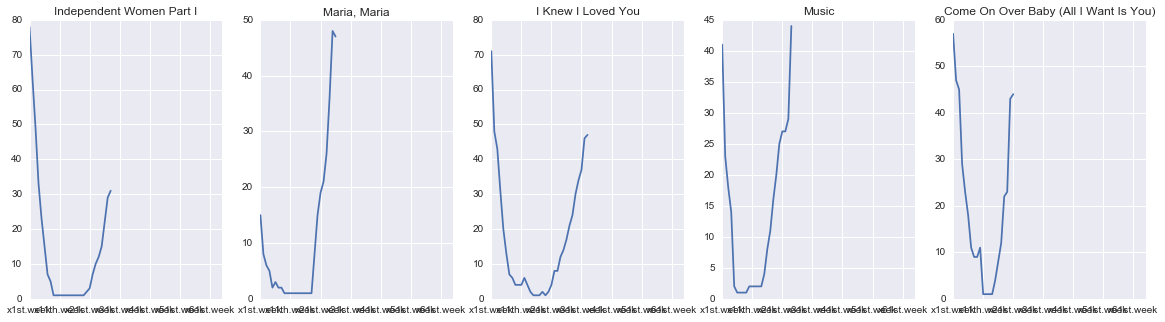

In [96]:
fig, ax = plt.subplots(1, 5, figsize = (20,5));
for i in range(5):
    r = i / 5
    c = i - (r * 5)
    df.iloc[i, 7:72].plot(ax=ax[c], title=df.iloc[i,2]);

## 7. What does the data tell us?

### a. What's almost immediately apparent?

In [373]:
df.iloc[:,72:].describe(include='all')

,track_length_seconds,genre_clean,genre_cat,date_entered,date_peaked,weeks_to_peak,weeks_on_billboard,highest_rank,ranks_climbed
count,317.000000,317,317.000000,317,317,317.000000,317.000000,317.000000,317.000000
unique,NaN,5,NaN,68,53,NaN,NaN,NaN,NaN
top,NaN,Rock,NaN,2000-01-29 00:00:00,2000-12-02 00:00:00,NaN,NaN,NaN,NaN
freq,NaN,137,NaN,11,17,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1999-06-05 00:00:00,2000-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2000-12-30 00:00:00,2000-12-30 00:00:00,NaN,NaN,NaN,NaN
mean,242.425868,NaN,1.536278,NaN,NaN,7.463722,16.741325,44.123028,35.835962
std,42.401618,NaN,1.491360,NaN,NaN,5.838229,9.083785,29.223722,25.061031
min,156.000000,NaN,0.000000,NaN,NaN,0.000000,1.000000,1.000000,-0.000000
25%,219.000000,NaN,0.000000,NaN,NaN,3.000000,10.000000,20.000000,14.000000


Although there are other columns with numerical data, only the above columns actually refer to a component of the data that could be continuous.

In [322]:
df['highest_rank'][df['highest_rank'] == 1.0].count()

17

- 'weeks_to_peak' has a minimum value of 0
    - There are tracks which hit Number 1 the moment they got into top 100
- 'weeks_to_peak' has a mean value of 7.5
    - On average, it takes a track 7.5 weeks to hit its highest rank
- only 17 tracks reached the number 1 spot


### b. What else can we find out?

#### For the tracks that got to number 1, how long did they take?

In [323]:
df[['weeks_to_peak']][df['highest_rank'] == 1.0].describe()

,weeks_to_peak
count,17.000000
mean,13.529412
std,8.668316
min,5.000000
25%,8.000000
50%,12.000000
75%,13.000000
max,39.000000


#### What is the highest rank obtained by each genre and how many tracks of each genre hit the top 100?

In [324]:
pd.pivot_table(df, index=['genre_clean'], values=['highest_rank'],aggfunc=[min, len], margins=True)

,min,len
,highest_rank,highest_rank
genre_clean,,
Country,1.0,74.0
Latin,1.0,9.0
Others,5.0,39.0
Rap,2.0,58.0
Rock,1.0,137.0
All,1.0,317.0


#### Going back to our problem statements

- Does the genre of a song affect how long it takes to peak in the top 100?
- Does the length of a song affect how long it takes to peak in the top 100?
- Does the amount of time a song takes to peak affect how long it stays in the top 100?

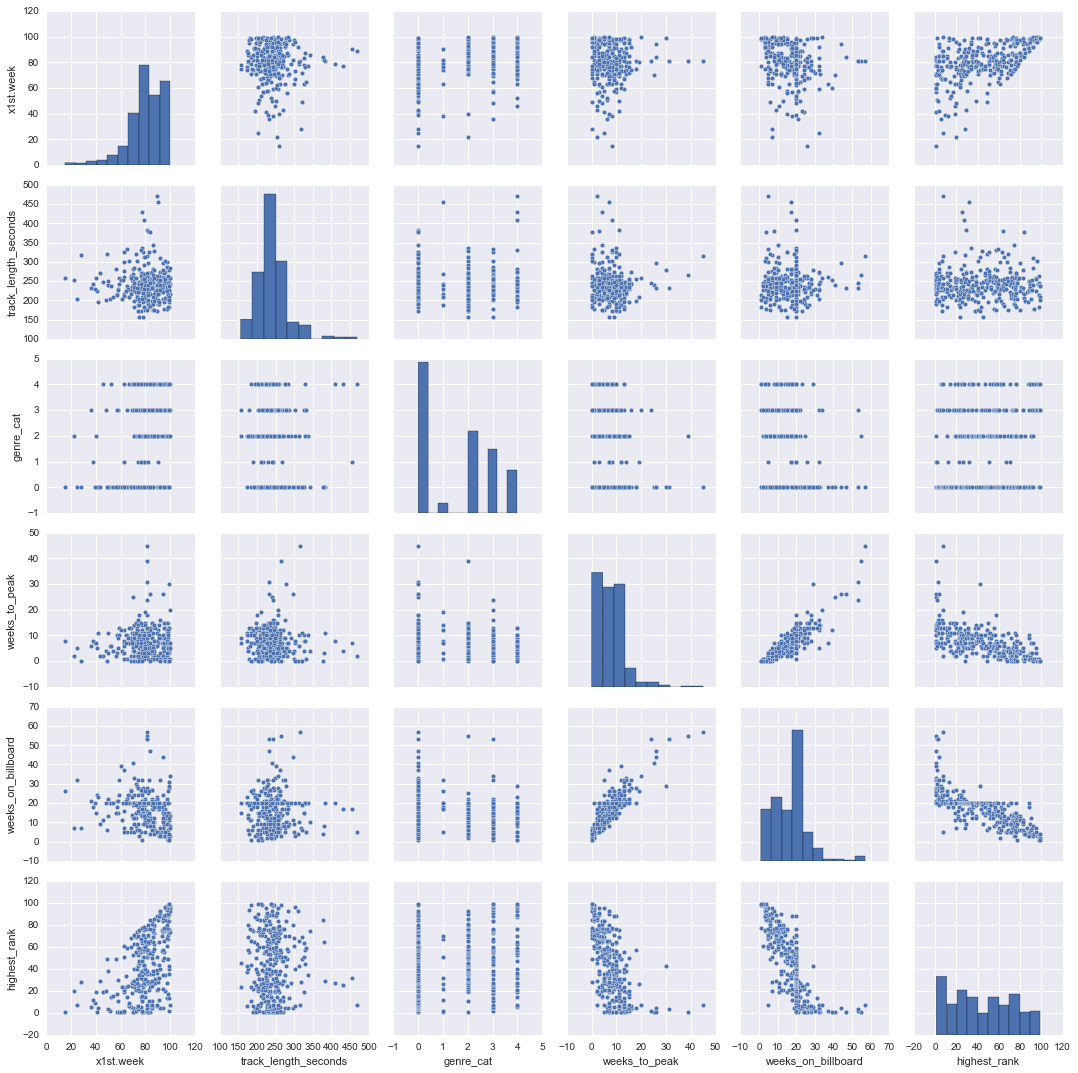

In [368]:
sns.pairplot(df.iloc[:,[7,72,73,74,75,76,77,78, 79]]);

In [360]:
genre_cats = df['genre_cat'].unique()

def draw_dist_plots(df, col):
    fig, ax = plt.subplots(2,3, figsize=(16,8), sharey=True);
    for i in genre_cats:
        if i < 3:
            r = 0
            c = i
        else:
            r = 1
            c = i - 3
        sns.distplot(df[[col]][df['genre_cat']==i], ax=ax[r][c]);
        ax[r][c].set_title(genres[i]);

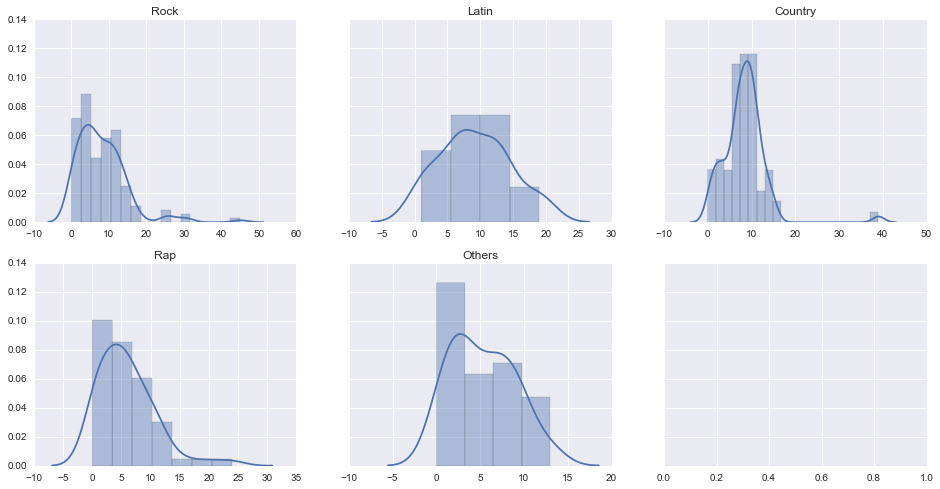

In [361]:
draw_dist_plots(df, 'weeks_to_peak')

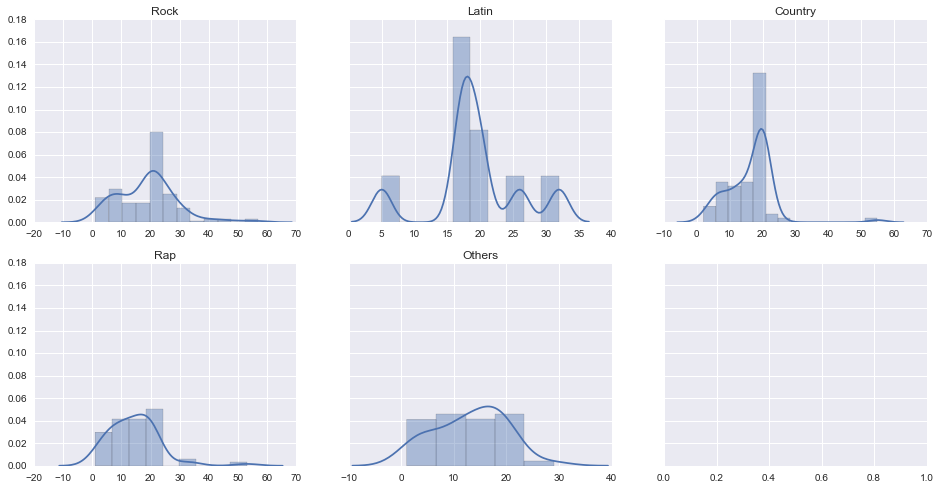

In [362]:
draw_dist_plots(df, 'weeks_on_billboard')

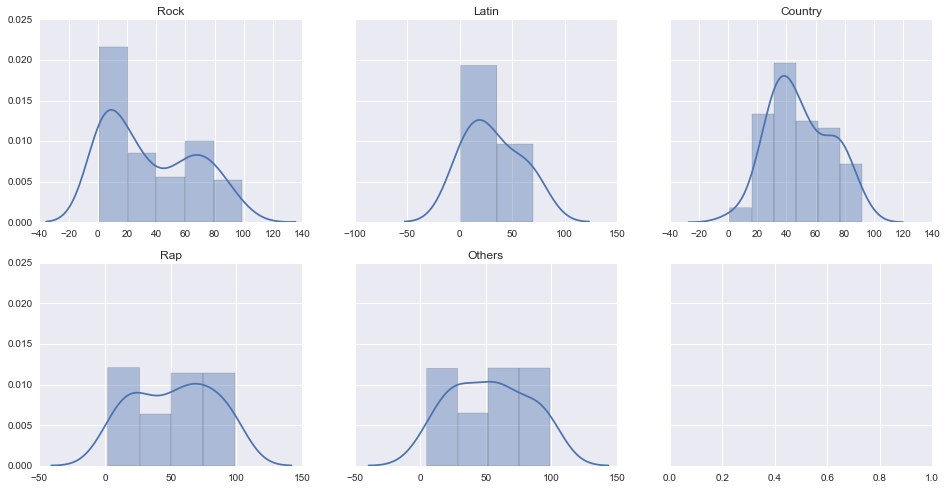

In [363]:
draw_dist_plots(df, 'highest_rank')

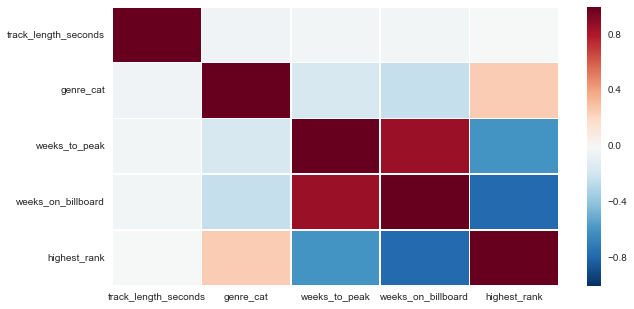

In [326]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.iloc[:,72:].corr(), linewidths=.5, ax= ax);

In [224]:
pd.melt(df, id_vars=['track','genre'],value_vars=['weeks_to_peak', 'highest_rank'])

,track,genre,variable,value
0,Independent Women Part I,Rock,weeks_to_peak,8.0
1,"Maria, Maria",Rock,weeks_to_peak,8.0
2,I Knew I Loved You,Rock,weeks_to_peak,14.0
3,Music,Rock,weeks_to_peak,5.0
4,Come On Over Baby (All I Want Is You),Rock,weeks_to_peak,10.0
5,Doesn't Really Matter,Rock,weeks_to_peak,10.0
6,Say My Name,Rock'n'roll,weeks_to_peak,12.0
7,Be With You,Latin,weeks_to_peak,12.0
8,Incomplete,Rock'n'roll,weeks_to_peak,7.0
9,Amazed,Country,weeks_to_peak,39.0


In [225]:
df.to_csv(path_or_buf='billboards2.csv')